In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Bisection Method

In [2]:
x = np.linspace(-10,10)

In [3]:
def f(x):
#     y = x**2 - 3*x - 2
    y = x**3 + x**2 - 3*x - 2
    return y

y = f(x)

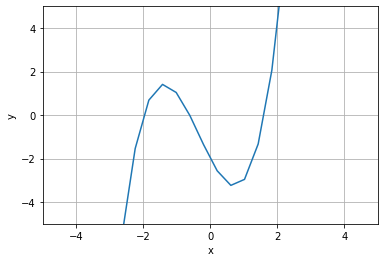

In [4]:
plt.plot(x,y)
plt.grid()
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

there is a root between -1 and 0
there is a root between 3 and 4


root =  [-0.5625, 3.5625]
error =  [0.00390625, 0.00390625]


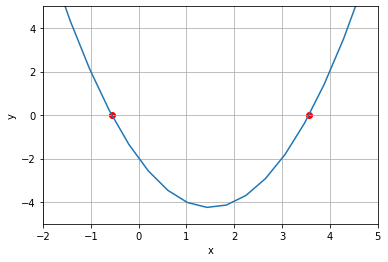

In [5]:
lowbound = -10
highbound = 10
threshold = 0.05
akar, error = [], []

# defining the equation
def f(x):
    y = x**2 - 3*x - 2  # 1
#     y = x**3 + x**2 - 3*x - 2  # 2
    return y

# main function
def bisection(a,b,threshold):
    m = (a+b)/2 # calculate the mean
    if f(m)*f(a)<0:
        b = m
    else:
        a = m
    if abs(f(m)) < threshold : # error threshold
        error = abs(f(m))
        return m,error
    else:
        return bisection(a,b,threshold) # repeat the function if the
                                        # threshold has not been fulfilled

# main program
for i in range(lowbound,highbound):
    b = i
    a = i-1
    if f(a) * f(b) <= 0: 
        if f(a)!=0: # a condition to make sure not to repeat the command
                    # because f(a) is on the same point as f(b)
                    # in the last iteration
            print('there is a root between {0} and {1}'.format(a,b))
            akar.append(bisection(a,b,threshold)[0])
            error.append(bisection(a,b,threshold)[1])

print('\n')
print('root = ',akar)
print('error = ',error)

# plotting
x = np.linspace(-10,10)
y = f(x)
plt.plot(x,y)
plt.grid()
plt.xlim(-2,5)
plt.ylim(-5,5)
plt.xlabel('x')
plt.ylabel('y')
for i in akar:
    plt.scatter(i,0,color='r')
plt.show()

# Area under the curve (case of 3/4 circle)

Area =  84.55329377230682
Error =  0.2697078746175947


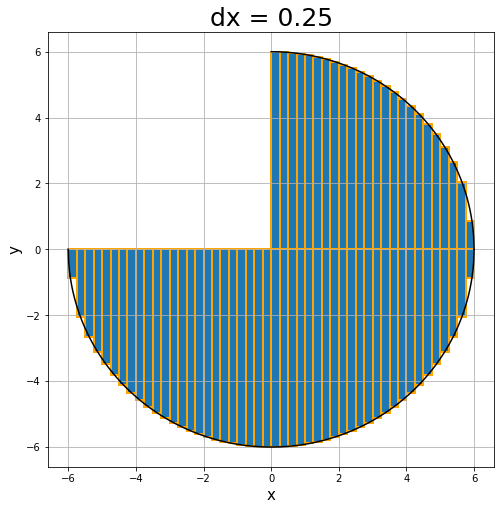

In [8]:
# input data
dx = 0.25
r = 6 # radius

# equation
def f(x, r=r):
    y = np.sqrt(-x**2 + r**2)
    return y

# area under positive domain
def areapositif(dx, r=r):
    luaspositif = 0
    x = 0 # starting point
    while x < r:
        luaspositif += (f(x)+f(x+dx)) / 2 * dx
        x = x + dx
    return luaspositif
    
# area above positive domain
def areanegatif(dx, r=r):
    luasnegatif = 0
    x = -r
    while x < r:
        luasnegatif += (-f(x)-f(x+dx)) / 2 * dx
        x = x + dx
    return abs(luasnegatif)

area = areapositif(dx) + areanegatif(dx)

# calculate the error by subtracting the calculated area with analytical area
error = abs(area - np.pi*r**2 * 3/4) 

print('Area = ',area)
print('Error = ',abs(error))


# plotting
import matplotlib.patches as patches
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

x = np.linspace(-6,6,1000)
y = f(x)

i = 0
while i<6:
    box = patches.Rectangle((i,0),dx,(f(i)+f(i+dx))/2,edgecolor='orange',linewidth=2)
    ax.add_patch(box)
    i = i+dx

i = -6
while i<6:
    box = patches.Rectangle((i,0),dx,-(f(i)+f(i+dx))/2,edgecolor='orange',linewidth=2)
    ax.add_patch(box)
    i = i+dx
    
ax.plot(x[500:1000],y[500:1000],color='black')
ax.plot(x,-y,color='black')
plt.title('dx = {}'.format(dx), size=25)
plt.xlabel('x',size='15')
plt.ylabel('y',size='15')
plt.grid()
plt.show()

# Runge - Kutta

the last temperature for step 30 =  636.8501373644029
the last temperature for step 60 =  626.808953489823
the last temperature for step 120 =  607.5572809270974
the last temperature for step 240 =  543.9408281016999
the last temperature for step 480 =  -81.75650193239535


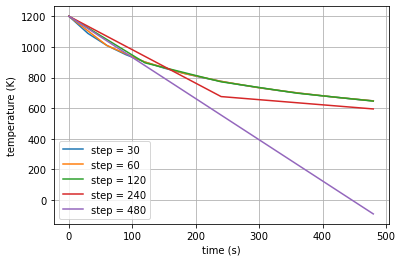

In [10]:
# equation
def f(x,y):
    eq = -2.2067 * 10**-12 * (y**4 - 8.1 * 10**9)
    return eq

# main function
def rungekutta(h,x0,y0,xt=480):
    x = 0 
    time = [x] # define the variable of time for plotting purpose
    t = [y0] # define the variable of temperature for plotting purpose

    while x <= xt:
        # calculate k for each order (up to 4th order)
        k1 = f(x0,y0)
        k2 = f(x0+h/2 , y0+h*k1/2)
        k3 = f(x0+h/2 , y0+h*k2/2)
        k4 = f(x0+h, y0+h*k3)
        
        y = y0 + h/6 * (k1 + 2*k2 + 2*k3 + k4)
        
        # preparing the variable for the next iteration
        y0 = y
        x = x + h
        
        # append elements needed for plotting purpose
        if x<=xt:
            time.append(x)
            t.append(y0)
        
    yt = y0
    print('the last temperature for step {} = '.format(h),yt)
    return yt,t,time

# calculate temperature reduction for each step
step = [30,60,120,240,480]
for i in step:
    y1,t1,time1 = rungekutta(i,0,1200)
    plt.plot(time1,t1,label='step = {}'.format(str(i)))

# figure setting
plt.grid()
plt.xlabel('time (s)')
plt.ylabel('temperature (K)')
plt.legend(loc = 'lower left')
plt.show()

In [11]:
# calculation of temperature reduction for each step (result only)
y1,t1,time1 = rungekutta(30,0,1200)
y2,t2,time2 = rungekutta(60,0,1200)
y3,t3,time3 = rungekutta(120,0,1200)
y4,t4,time4 = rungekutta(240,0,1200)
y5,t5,time5 = rungekutta(480,0,1200)

the last temperature for step 30 =  636.8501373644029
the last temperature for step 60 =  626.808953489823
the last temperature for step 120 =  607.5572809270974
the last temperature for step 240 =  543.9408281016999
the last temperature for step 480 =  -81.75650193239535
